In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# y, sr = librosa.load(librosa.util.example_audio_file())
y, sr = librosa.load("/media/chris/M2/1-Raw_Data/Videos/1/audio/audio.wav")
print(len(y), "samples")
print(len(y)/sr, "seconds long")
hop_length = int(sr/30)
print("hop_length = Sample Rate / 30 = ", sr/30)
print("in order for feature rate to match frame rate of video")

27165697 samples
1232.0043990929705 seconds long
hop_length = Sample Rate / 30 =  735.0
in order for feature rate to match frame rate of video


In [37]:
def plot_features(features, name):
    plt.figure(figsize=(20, 4))
    librosa.display.specshow(features, x_axis='time')
    plt.colorbar()
    plt.title(name)
    plt.tight_layout()
    print(np.amax(features),np.amin(features),features.shape)

209.01889 -500.6095 (20, 36961)


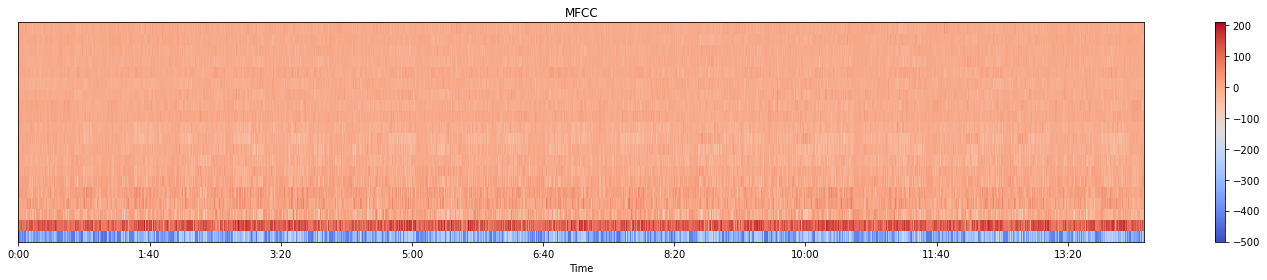

In [39]:
plot_features(librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length), "MFCC")

0.0 -80.0 (20, 36961)


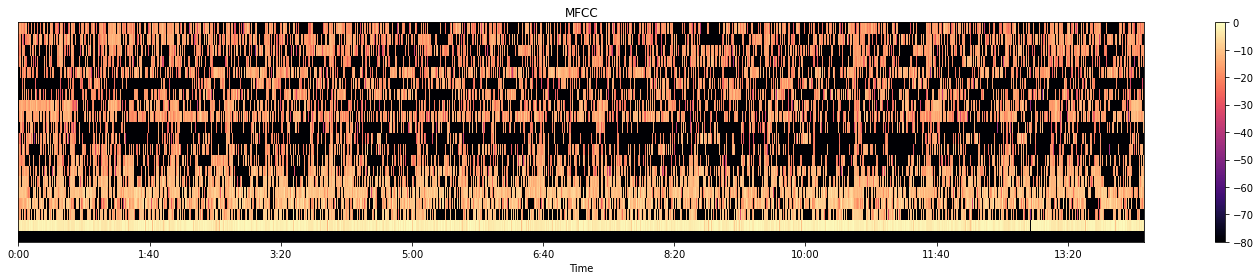

In [42]:
plot_features(librosa.power_to_db(librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length),ref=np.max), "MFCC")

1.0 0.00020573208 (12, 36961)


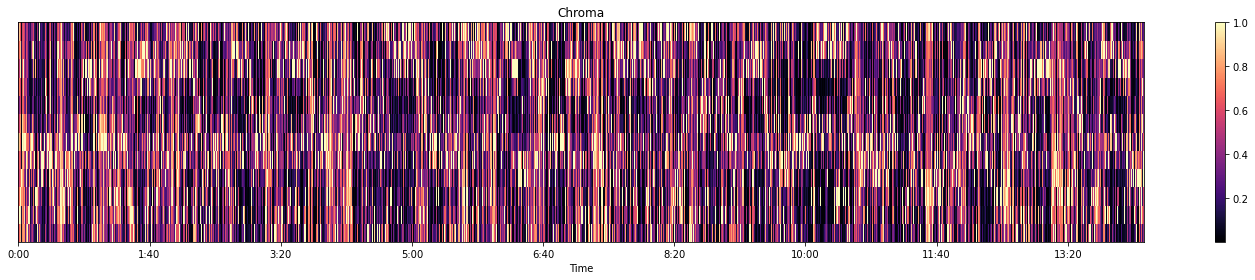

In [43]:
plot_features(librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length), "Chroma")

0.0 -80.0 (128, 36961)


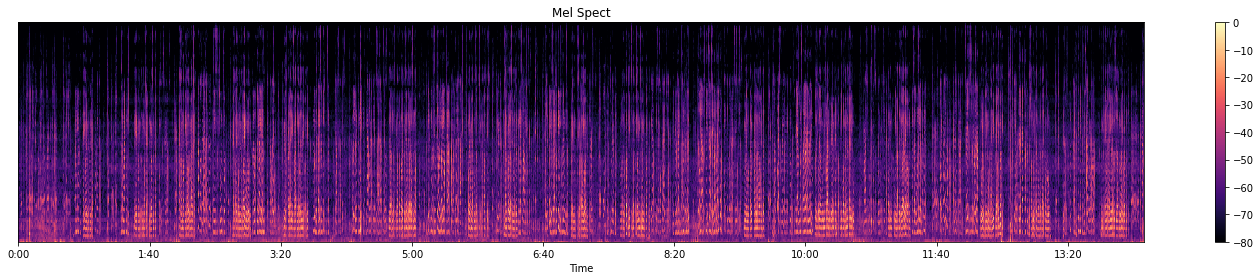

In [44]:
plot_features(librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length),ref=np.max), "Mel Spect")

45.62205766444213 2.7968848469161762 (7, 36961)


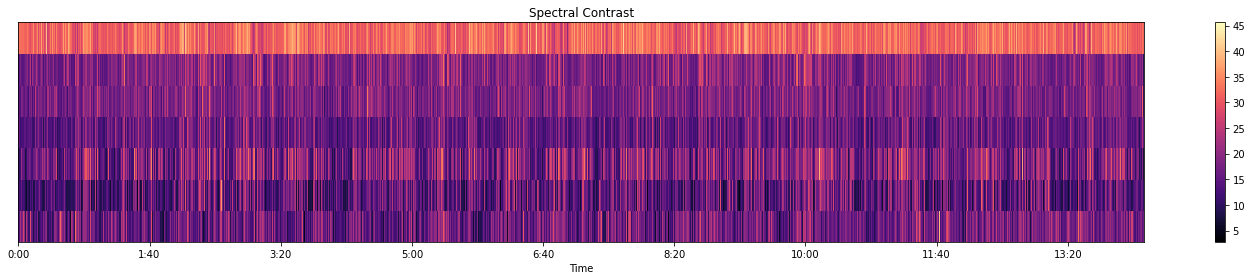

In [51]:
plot_features(librosa.feature.spectral_contrast(S=np.abs(librosa.stft(y, hop_length=hop_length)), sr=sr, hop_length=hop_length), "Spectral Contrast")

0.7120922470800984 -0.6649392461404205 (6, 38588)


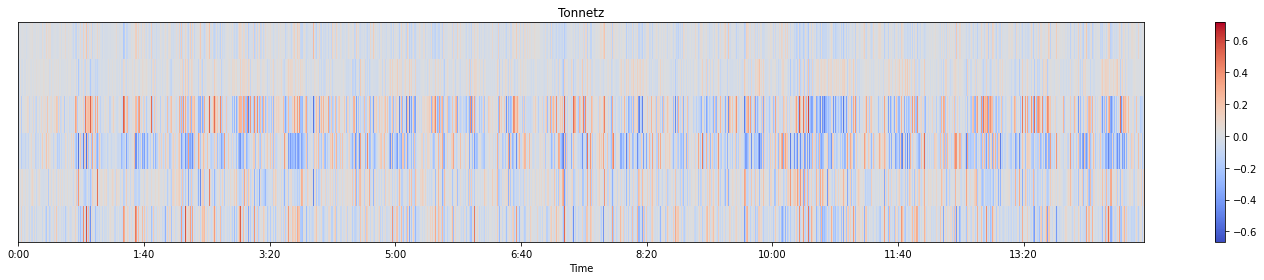

In [46]:
plot_features(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr, hop_length=704), "Tonnetz")

0.0 -9.736710612776509 (1, 36961)


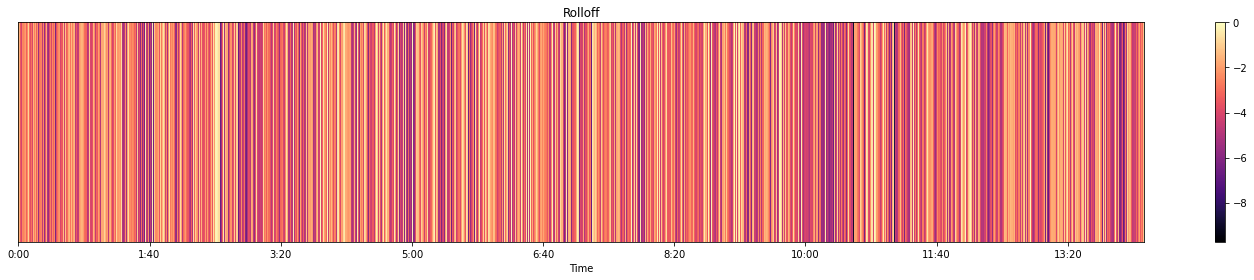

In [47]:
plot_features(librosa.power_to_db(librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length, roll_percent=0.95),ref=np.max), "Rolloff")

In [52]:
import librosa
import sys
import argparse
import numpy as np
import pandas as pd


def create_csv(audio_file="/media/chris/M2/1-Raw_Data/Videos/1/audio/audio.wav", csv_path=None):
    y, sr = librosa.load(audio_file)
    hop_length = int(sr / 30)
    features = {
        "MFCC": librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length),
        "Chroma": librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length),
        "Mel Spect": librosa.power_to_db(
            librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length),
            ref=np.max,
        ),
        "Spectral Contrast": librosa.feature.spectral_contrast(
            S=np.abs(librosa.stft(y, hop_length=hop_length)), sr=sr, hop_length=hop_length
        ),
        # "Tonnetz":librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr, hop_length=704),
        "rolloff": librosa.power_to_db(
            librosa.feature.spectral_rolloff(
                y=y, sr=sr, hop_length=hop_length, roll_percent=0.95
            ),
            ref=np.max,
        ),
    }
    return features

features = create_csv()    

In [56]:
df = pd.concat(
        [pd.DataFrame(v) for k, v in features.items()],
        axis=0,
        keys=list(features.keys()),
    ).T
display(df)
df.columns = [f'{f}_{s}' if s != '' else f'{f}' for f, s in df.columns]
display(df)


MFCC                                                          \
              0           1          2          3          4          5     
0     -446.480682   66.659378  14.943621  11.140501  22.353600  10.660471   
1     -419.163269   82.974121   6.864061   3.768214  18.467308  11.901754   
2     -415.715759   87.717384   8.082465  -0.733384  13.697479  11.541858   
3     -412.687897   86.609268   4.986382   2.499516  15.424723   7.153235   
4     -417.584259   84.096817   6.991953   4.193178  16.714252  10.049091   
...           ...         ...        ...        ...        ...        ...   
36956 -188.248550  103.637733  -7.735435  13.681051   8.641674  30.411848   
36957 -278.757660  132.077789   3.855250  14.290440  11.692589  27.446568   
36958 -340.257355  120.112816  11.781449  17.235567  18.404545  22.582108   
36959 -360.420868  109.100082  -0.295748  18.082104  27.496353  23.617493   
36960 -364.645599   97.325195   3.713299  12.760967  27.878750  25.908081   

                                                  ...  Mel Spect             \
             6          7          8         9    ...        126        127   
0      -2.293005   0.281256   4.454000  3.974643  ... -80.000000 -80.000000   
1       3.525828   5.980259   7.408380  1.722025  ... -80.000000 -80.000000   
2       4.230954   5.297324   7.054005 -0.962542  ... -80.000000 -80.000000   
3      -0.362232   0.465398   3.836986  3.329482  ... -80.000000 -80.000000   
4       4.758427   5.325292   7.729855  4.817486  ... -80.000000 -80.000000   
...          ...        ...        ...       ...  ...        ...        ...   
36956   7.534672   5.705298  -4.494725 -5.627234  ... -73.300003 -80.000000   
36957  11.977523  10.152871   8.294877 -4.199206  ... -80.000000 -80.000000   
36958  10.333624   8.796947   6.372741 -7.242341  ... -80.000000 -80.000000   
36959  10.780389  10.926641  10.953665 -4.490197  ... -80.000000 -80.000000   
36960  11.996923  14.468860  13.387613 -3.586848  ... -78.381317 -79.187149   

      Spectral Contrast                                              \
                    0          1          2          3          4     
0             14.168056  13.230548  23.491075  20.036096  18.997441   
1             14.685343  12.284952  14.417469  12.218903  17.390729   
2             19.574182   8.673275   9.881981  12.359317  15.776429   
3             13.359715  16.939130  15.637694  11.760311  16.187058   
4             15.121349  12.180173  13.208457  13.478858  17.949271   
...                 ...        ...        ...        ...        ...   
36956         24.388535  18.541049   7.473016  16.448232  13.082617   
36957         22.048113  13.220033  16.761752  11.943929  16.456935   
36958         23.326233  12.911809   9.240869  16.349132  14.988705   
36959         19.328617  12.434115   7.643314  13.753299  17.568995   
36960         20.984220  16.428376  15.059493  12.799202  17.385668   

                              rolloff  
             5          6         0    
0      25.483322  34.661781 -1.633858  
1      13.432196  33.062469 -1.523245  
2      14.103156  32.846479 -1.627273  
3      15.972414  32.280957 -1.720387  
4      13.971914  35.019260 -1.542562  
...          ...        ...       ...  
36956  11.389907  31.337542 -1.207368  
36957  14.638255  31.477228 -2.621119  
36958  16.379711  32.876654 -2.612855  
36959  14.340016  15.758873 -2.738503  
36960  18.081217  15.512019 -1.095324  

[36961 rows x 168 columns]

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,Mel Spect_126,Mel Spect_127,Spectral Contrast_0,Spectral Contrast_1,Spectral Contrast_2,Spectral Contrast_3,Spectral Contrast_4,Spectral Contrast_5,Spectral Contrast_6,rolloff_0
0,-446.480682,66.659378,14.943621,11.140501,22.353600,10.660471,-2.293005,0.281256,4.454000,3.974643,...,-80.000000,-80.000000,14.168056,13.230548,23.491075,20.036096,18.997441,25.483322,34.661781,-1.633858
1,-419.163269,82.974121,6.864061,3.768214,18.467308,11.901754,3.525828,5.980259,7.408380,1.722025,...,-80.000000,-80.000000,14.685343,12.284952,14.417469,12.218903,17.390729,13.432196,33.062469,-1.523245
2,-415.715759,87.717384,8.082465,-0.733384,13.697479,11.541858,4.230954,5.297324,7.054005,-0.962542,...,-80.000000,-80.000000,19.574182,8.673275,9.881981,12.359317,15.776429,14.103156,32.846479,-1.627273
3,-412.687897,86.609268,4.986382,2.499516,15.424723,7.153235,-0.362232,0.465398,3.836986,3.329482,...,-80.000000,-80.000000,13.359715,16.939130,15.637694,11.760311,16.187058,15.972414,32.280957,-1.720387
4,-417.584259,84.096817,6.991953,4.193178,16.714252,10.049091,4.758427,5.325292,7.729855,4.817486,...,-80.000000,-80.000000,15.121349,12.180173,13.208457,13.478858,17.949271,13.971914,35.019260,-1.542562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36956,-188.248550,103.637733,-7.735435,13.681051,8.641674,30.411848,7.534672,5.705298,-4.494725,-5.627234,...,-73.300003,-80.000000,24.388535,18.541049,7.473016,16.448232,13.082617,11.389907,31.337542,-1.207368
36957,-278.757660,132.077789,3.855250,14.290440,11.692589,27.446568,11.977523,10.152871,8.294877,-4.199206,...,-80.000000,-80.000000,22.048113,13.220033,16.761752,11.943929,16.456935,14.638255,31.477228,-2.621119
36958,-340.257355,120.112816,11.781449,17.235567,18.404545,22.582108,10.333624,8.796947,6.372741,-7.242341,...,-80.000000,-80.000000,23.326233,12.911809,9.240869,16.349132,14.988705,16.379711,32.876654,-2.612855
36959,-360.420868,109.100082,-0.295748,18.082104,27.496353,23.617493,10.780389,10.926641,10.953665,-4.490197,...,-80.000000,-80.000000,19.328617,12.434115,7.643314,13.753299,17.568995,14.340016,15.758873,-2.738503
